In [23]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

from dotenv import load_dotenv

import scipy.signal as ss

In [2]:
load_dotenv()
base_dir = os.getenv('BASE_DIR')

In [39]:
aligend_whole_brain_file = os.path.join(base_dir, "fus2mri", "fusi_corrected-transformed.nii.gz")
aligned_chunk_zion_file = os.path.join(base_dir, "chunk2whole_zion", "Zion_3D_corrected-transformed.nii.gz")
aligned_slice_zion_file = os.path.join(base_dir, "slice2chunk_zion", "022024_1-5", "Zion_MarmoAudio_0220_2D_corrected-transformed.nii.gz")
raw_slice_zion_file = os.path.join(base_dir, "slice2chunk_zion", "022024_1-5", "Zion_MarmoAudio_0220_2D_corrected.nii.gz")

aligend_whole_brain = nib.load(aligend_whole_brain_file)
aligned_chunk_zion = nib.load(aligned_chunk_zion_file)
aligned_slice_zion = nib.load(aligned_slice_zion_file)
raw_slice_zion = nib.load(raw_slice_zion_file)

NameError: name 'aligned_whole_brain' is not defined

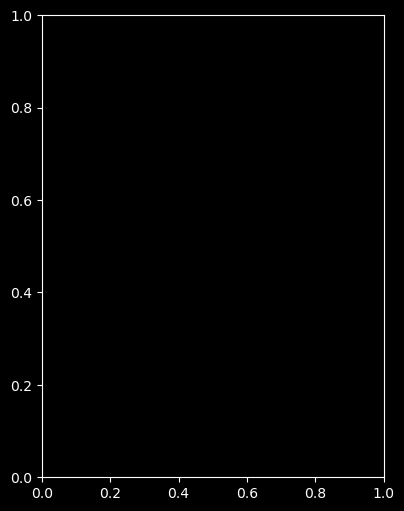

In [40]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(np.rot90(aligned_whole_brain.get_fdata()[5, :, :]), cmap='gray')
plt.title('Aligned Chunk (same slice)')  
plt.subplot(1, 3, 2)
plt.imshow(np.rot90(aligned_slice_zion.get_fdata()[5, :, :]), cmap='gray')
plt.title('Aligned Slice')    

plt.subplot(1, 3, 3)
plt.imshow(np.rot90(raw_slice_zion.get_fdata()[:, 0, :]), cmap='gray')
plt.title('Raw Slice')       

plt.show()

In [44]:
aligend_whole_brain.shape

(147, 200, 135)

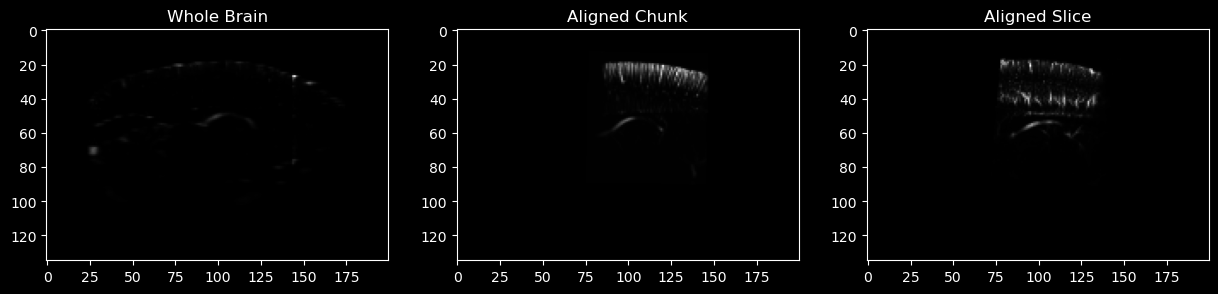

In [46]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(np.rot90(aligend_whole_brain.get_fdata()[5+75, :, :]), cmap='gray')
plt.title('Whole Brain')  
plt.subplot(1, 3, 2)
plt.imshow(np.rot90(aligned_chunk_zion.get_fdata()[5, :, :]), cmap='gray')
plt.title('Aligned Chunk')    

plt.subplot(1, 3, 3)
plt.imshow(np.rot90(aligned_slice_zion.get_fdata()[5, :, :]), cmap='gray')
plt.title('Aligned Slice')       

plt.show()

In [19]:
def normalize_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

In [20]:
normalized_chunk_zion = normalize_image(aligned_chunk_zion.get_fdata())
normalized_slice_zion = normalize_image(aligned_slice_zion.get_fdata())

In [30]:
image_A = normalized_chunk_zion[5, :, :]
image_B = normalized_slice_zion[5, :, :]

correlation = ss.correlate2d(image_A, image_B, mode='same')

In [27]:
image_A.shape

(200, 135)

In [31]:
correlation.shape

(200, 135)

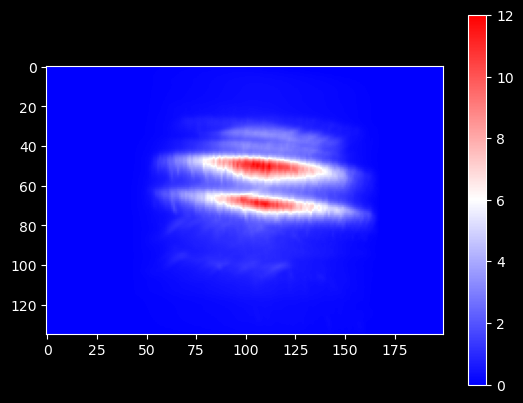

In [33]:
plt.imshow(np.rot90(correlation), cmap='bwr')
plt.colorbar()
plt.show()

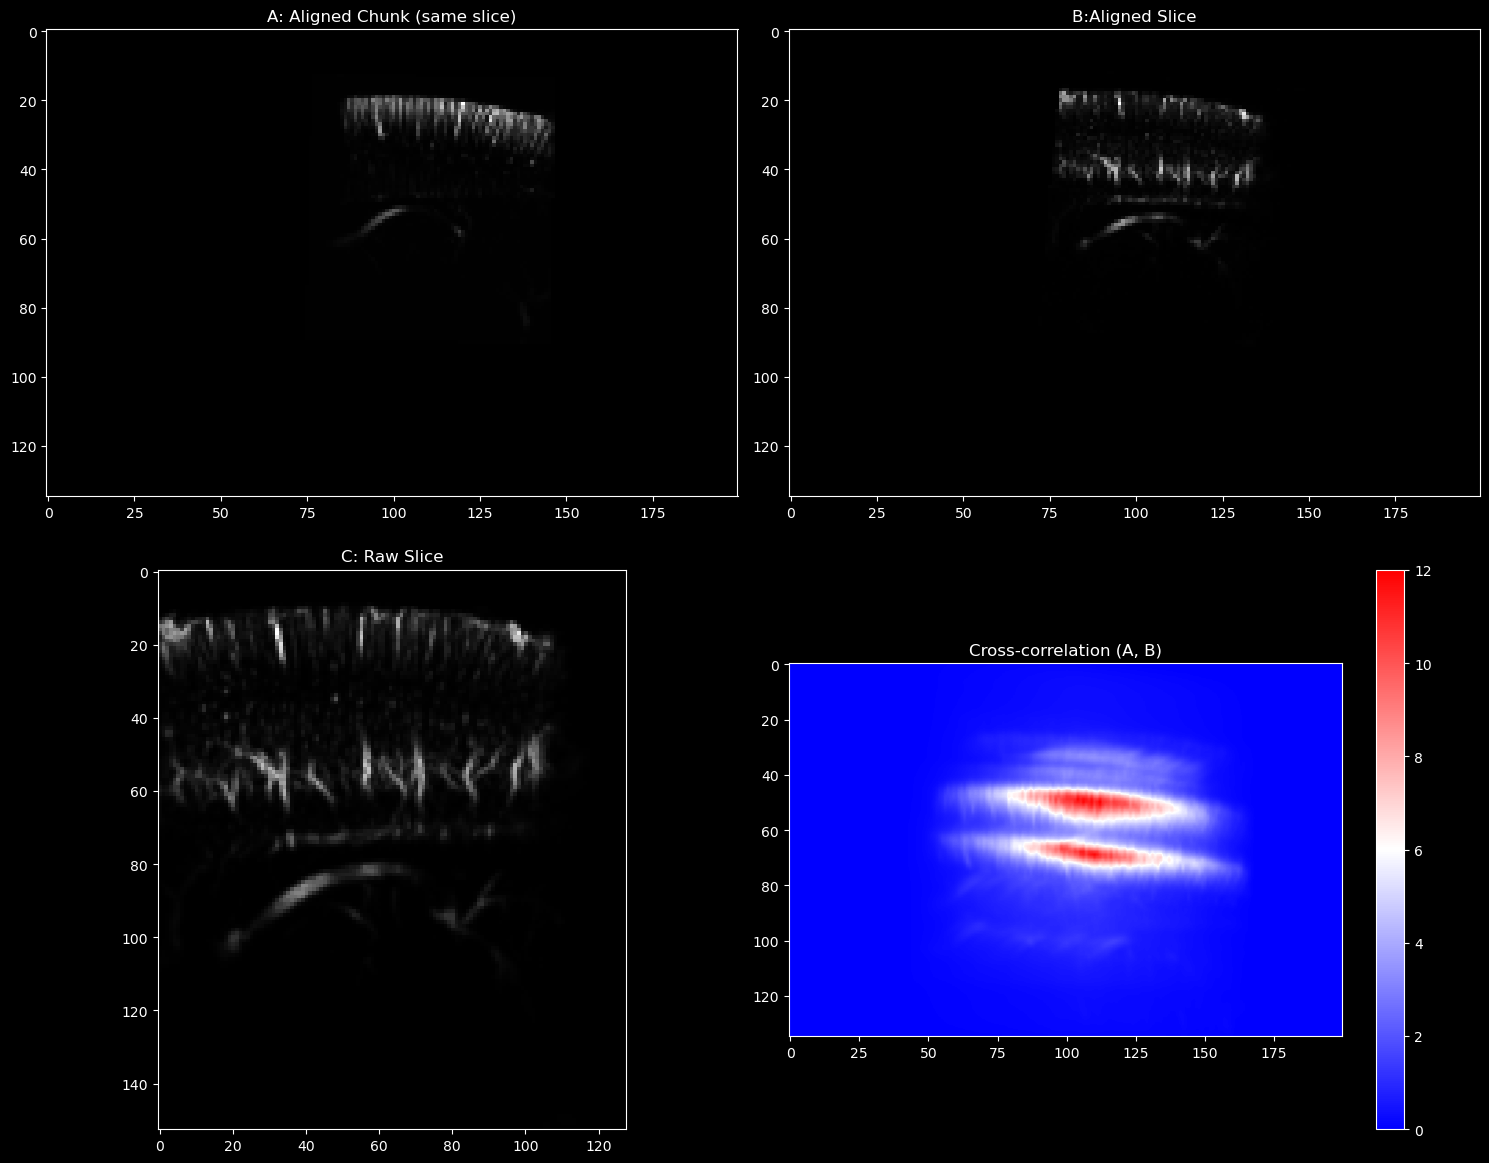

In [38]:
plt.figure(figsize=(15, 12)) 

plt.subplot(2, 2, 1) 
plt.imshow(np.rot90(aligned_chunk_zion.get_fdata()[5, :, :]), cmap='gray')
plt.title('A: Aligned Chunk (same slice)') 

plt.subplot(2, 2, 2)
plt.imshow(np.rot90(aligned_slice_zion.get_fdata()[5, :, :]), cmap='gray')
plt.title('B:Aligned Slice')

plt.subplot(2, 2, 3)
plt.imshow(np.rot90(raw_slice_zion.get_fdata()[:, 0, :]), cmap='gray')
plt.title('C: Raw Slice') 

plt.subplot(2, 2, 4)
plt.imshow(np.rot90(correlation), cmap='bwr')
plt.colorbar()
plt.title('Cross-correlation (A, B)')

plt.tight_layout()
plt.show()